In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'
import itertools


import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)

In [4]:
lines = [
         range(5884, 5944),
         range(6564, 6614),
         range(6004,6064),
         range(6462, 6517),
         range(7117, 7124),
         range(6804, 6864),
         range(6534, 6564)+range(6348, 6408),
         range(6744, 6804)+range(7044,7054),
         range(7054, 7060),
         range(6864,6924),
         range(7110, 7117),
         range(917, 1017)]
variables = [
    'MeanVel',
    'B0FieldStrength',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$\Omega(V_{xy}), \partial B /\partial Z=0, E_0= 1 \frac{MV}{m}$",
               r"$\Omega(B_{0}), \partial B /\partial Z=0, E_0= 1 \frac{MV}{m}$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=0, E_0=1 \frac{MV}{m}, 1 s$",
               r"$\Omega(V_{xy}), 10xB_0,, \partial B /\partial Z=0 E_0=1 \frac{MV}{m}$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=0, E_0= 10 \frac{MV}{m}$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=0, E_0= 100 \frac{MV}{m}$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=1\frac{pT}{cm}, E_0=0$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=1\frac{nT}{cm}, E_0=0$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=1\frac{pT}{cm}, E_0=0, 1000 s$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=100\frac{pT}{cm}, E_0=0$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=10\frac{pT}{cm}, E_0=0$",
               r"$\Omega(V_{xy}), \partial B /\partial Z=100\frac{pT}{cm}, E_0=10 \frac{MV}{m}, 1 s$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:193/(0.235*4.84578839927e7*x),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-5),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


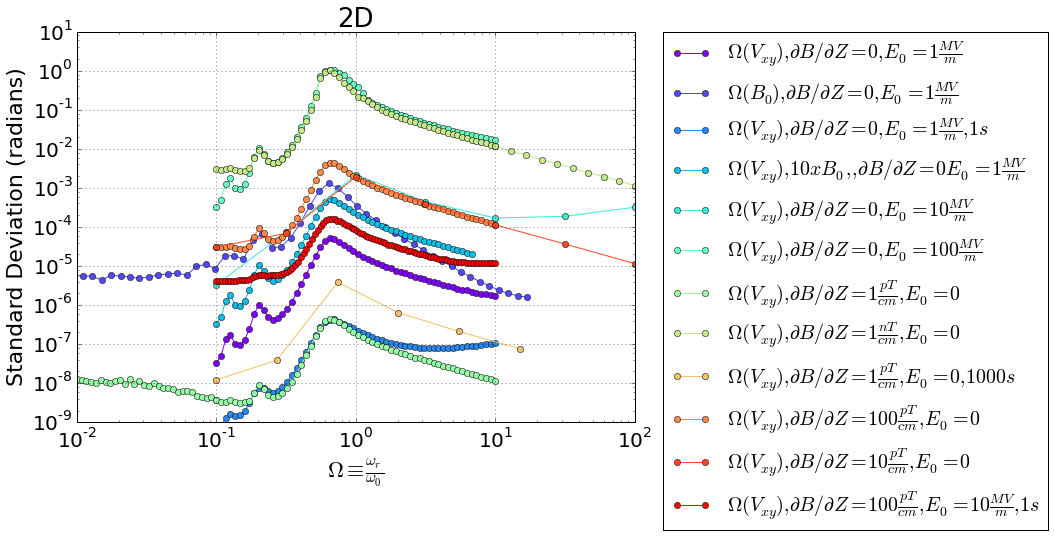

In [88]:
plot_type="PhiStDev"
y_axis_title=r"Standard Deviation (radians)"


main_title = '2D'
x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]

       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 

 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
  
    
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")
plt.axis([ 1e-2, 1e2,1e-9,10])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


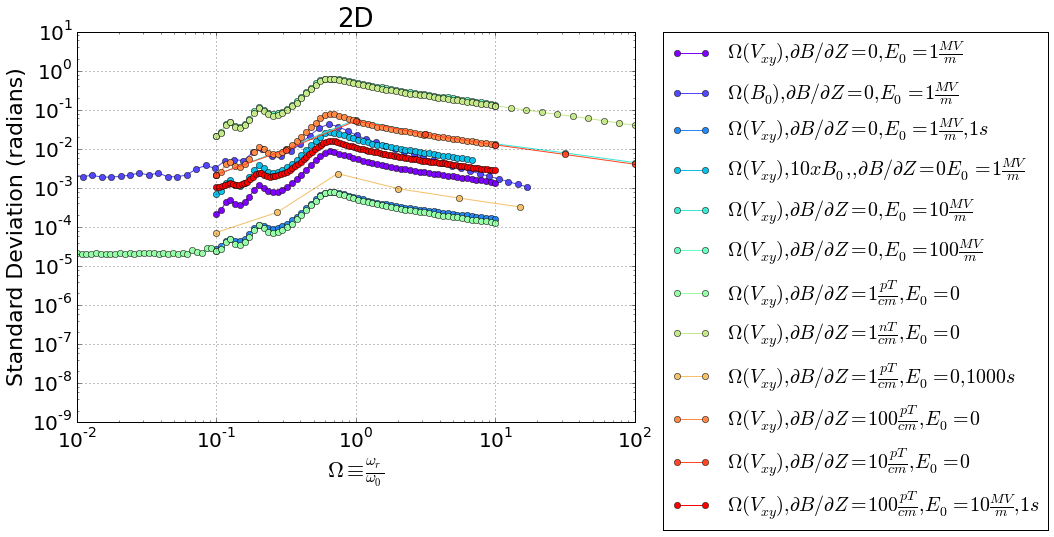

In [12]:
plot_type="ThetaStDev"
y_axis_title=r"Standard Deviation (radians)"


main_title = '2D'
x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]

       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 

 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
  
    
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")
plt.axis([ 1e-2, 1e2,1e-9,10])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


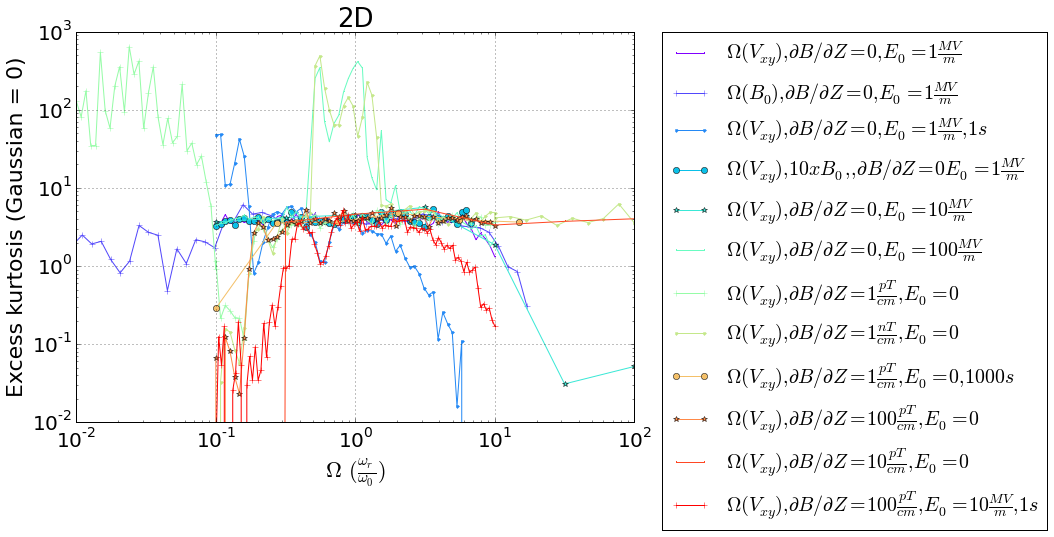

In [3]:
plot_type="PhiKurtosis"
y_axis_title=r"Excess kurtosis (Gaussian = 0)"


main_title = '2D'
x_axis_title = r'$\Omega\,(c\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
marker = itertools.cycle((',', '+', '.', 'o', '*')) 

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker = marker.next())
plt.axis([ 1e-2, 1e2,1e-2,1e3])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


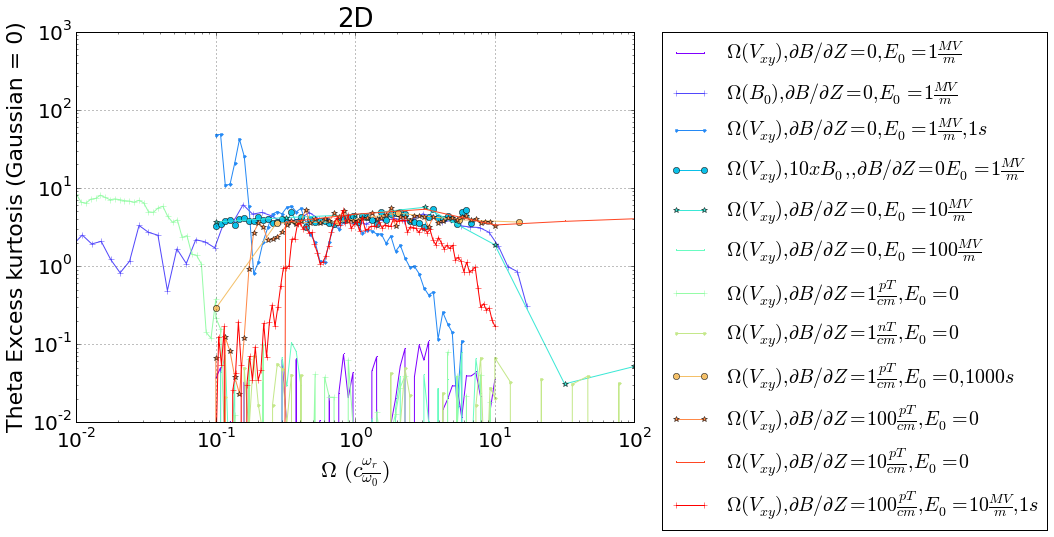

In [7]:
plot_type="ThetaKurtosis"
y_axis_title=r"Theta Excess kurtosis (Gaussian = 0)"


main_title = '2D'
x_axis_title = r'$\Omega\,(c\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
marker = itertools.cycle((',', '+', '.', 'o', '*')) 

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker = marker.next())
plt.axis([ 1e-2, 1e2,1e-2,1e3])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


/home/mjbales/work/software/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


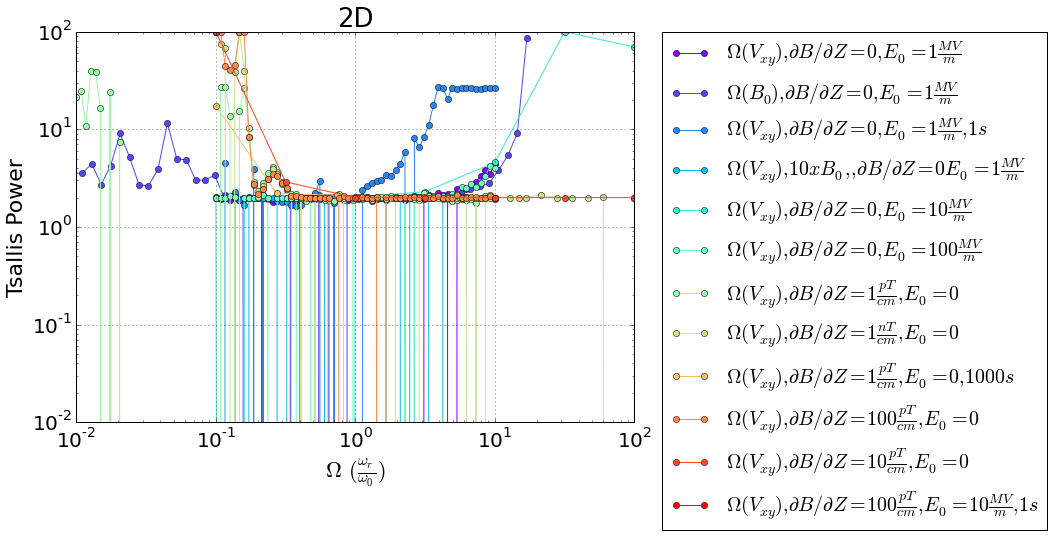

In [4]:
plot_type="PhiTsallisPower"
y_axis_title=r"Tsallis Power"


main_title = '2D'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")
plt.axis([ 1e-2, 1e2,1e-2,1e2])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


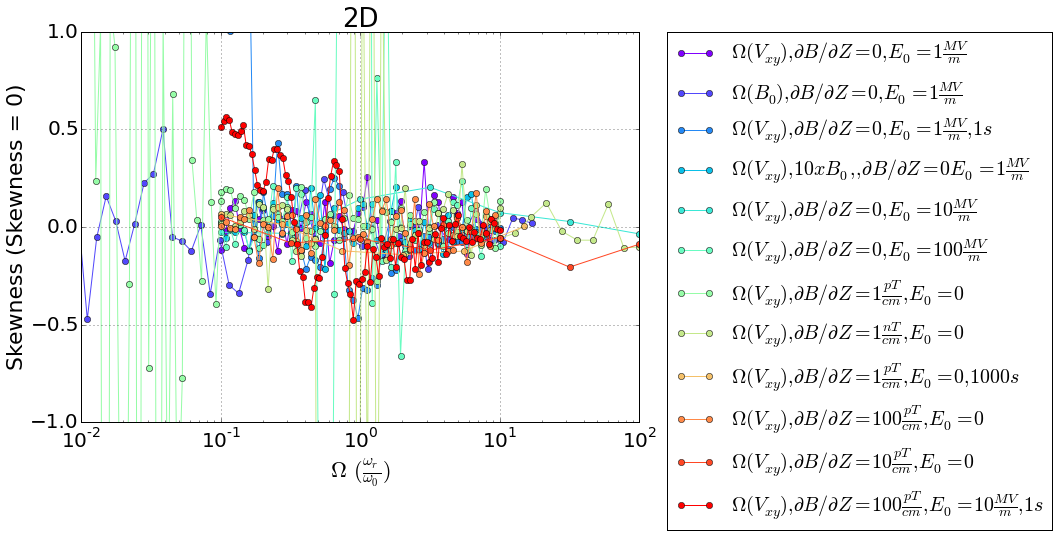

In [7]:
plot_type="PhiSkewness"
y_axis_title=r"Skewness (Skewness = 0)"


main_title = '2D'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")
plt.axis([ 1e-2, 1e2,-1,1])
# plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


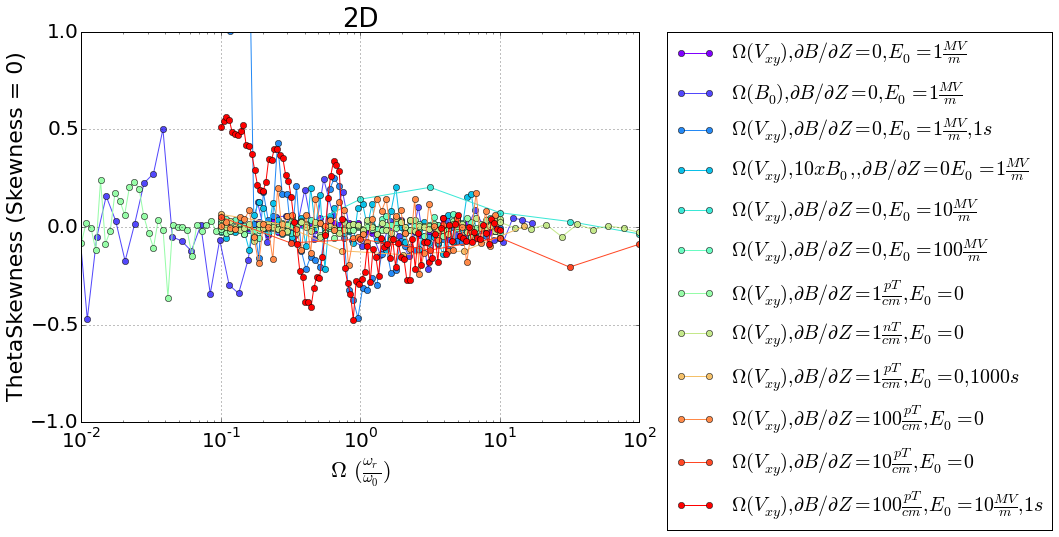

In [8]:
plot_type="ThetaSkewness"
y_axis_title=r"ThetaSkewness (Skewness = 0)"


main_title = '2D'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")
plt.axis([ 1e-2, 1e2,-1,1])
# plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        


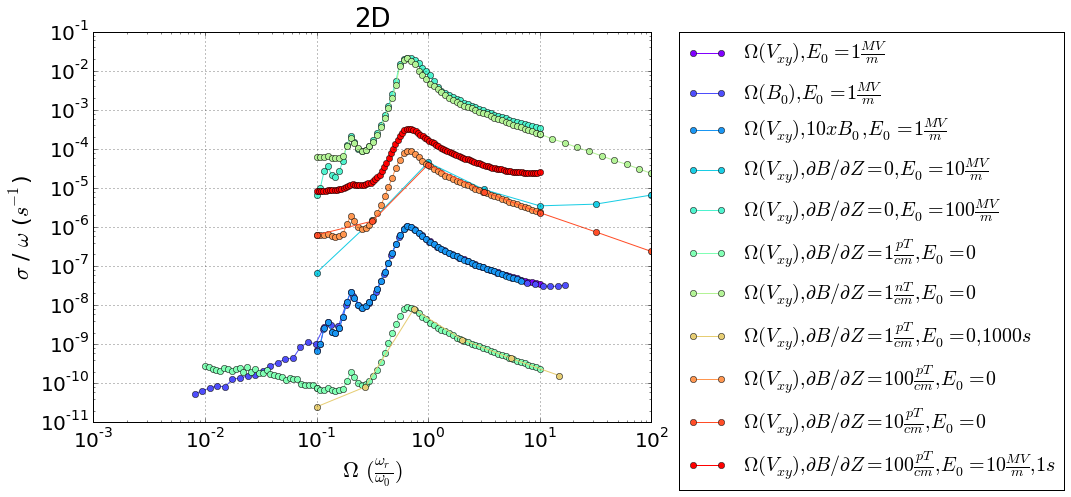

In [84]:
lambda_funcs=[[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x, lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x],
              [lambda x:193/(0.235*4.84578839927e7*x),lambda x:x, lambda x:193/(0.235*4.84578839927e7*x),lambda x:x]]

plot_type="PhiStDev"
y_axis_title=r"$\sigma$ / $\omega $ ($s^{-1}$)"


main_title = '2D'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'


color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))

for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type,"Par_PhiMean"]) 
    
    means=data[0][2]
    
    data=data[0][0:2]
    x,y= a_line = [map(lambda_func[j], data[j]) for j in range(len(data))] # Implement lambda funcs on a line
    
    for j in range(len(y)):
        y[j]=y[j]/(means[j]/100)

    plt.errorbar(x, y,label = legend_titles[i],c=next(color),marker="o")

plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=20)
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()
                        
